In [1]:
import pandas as pd
import numpy as np
from pathlib import Path
import seaborn as sns
import matplotlib.pyplot as plt
import os

%matplotlib inline
sns.set_theme(style="whitegrid")

In [2]:
DATAPATH = Path('../data')

os.listdir(DATAPATH)

['train_targets_scored.csv',
 'train_features.csv',
 'test_features.csv',
 'sample_submission.csv',
 'train_targets_nonscored.csv']

In [3]:
train_ft = pd.read_csv(DATAPATH/'train_features.csv')
train_tgt_sc = pd.read_csv(DATAPATH/'train_targets_scored.csv')
train_tgt_un = pd.read_csv(DATAPATH/'train_targets_nonscored.csv')
test_ft = pd.read_csv(DATAPATH/'test_features.csv')

In [4]:
train_ft.shape, train_tgt_sc.shape, train_tgt_un.shape, test_ft.shape

((23814, 876), (23814, 207), (23814, 403), (3982, 876))

In [5]:
train_ft.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [6]:
train_ft.describe()

,cp_time,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,...,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
count,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,...,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000,23814.000000
mean,48.020156,0.248366,-0.095684,0.152253,0.081971,0.057347,-0.138836,0.035961,-0.202651,-0.190083,...,-0.469244,-0.461411,-0.513256,-0.500142,-0.507093,-0.353726,-0.463485,-0.378241,-0.470252,-0.301505
std,19.402807,1.393399,0.812363,1.035731,0.950012,1.032091,1.179388,0.882395,1.125494,1.749885,...,2.000488,2.042475,2.001714,2.107105,2.159589,1.629291,2.059725,1.703615,1.834828,1.407918
min,24.000000,-5.513000,-5.737000,-9.104000,-5.998000,-6.369000,-10.000000,-10.000000,-10.000000,-10.000000,...,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000,-10.000000
25%,24.000000,-0.473075,-0.562200,-0.437750,-0.429575,-0.470925,-0.602225,-0.493900,-0.525175,-0.511675,...,-0.566175,-0.565975,-0.589975,-0.568700,-0.563775,-0.567975,-0.552575,-0.561000,-0.592600,-0.562900
50%,48.000000,-0.008850,-0.046600,0.075200,0.008050,-0.026900,-0.015650,-0.000650,-0.017900,0.010000,...,-0.009900,0.003250,-0.009100,-0.013750,-0.003300,-0.010250,-0.001250,-0.006800,0.014000,-0.019500
75%,72.000000,0.525700,0.403075,0.663925,0.463400,0.465375,0.510425,0.528725,0.411900,0.549225,...,0.457750,0.461500,0.445675,0.452900,0.470900,0.444750,0.465225,0.446400,0.461275,0.438650
max,72.000000,10.000000,5.039000,8.257000,10.000000,10.000000,7.282000,7.333000,5.473000,8.887000,...,4.069000,3.960000,3.927000,3.596000,3.747000,2.814000,3.505000,2.924000,3.111000,3.805000


<AxesSubplot:ylabel='Density'>

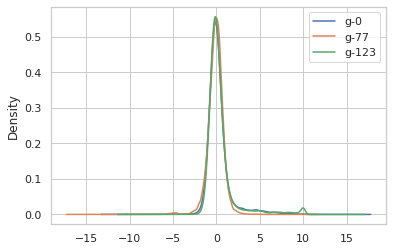

In [7]:
train_ft[['g-0', 'g-77', 'g-123']].plot.kde()

<AxesSubplot:ylabel='Density'>

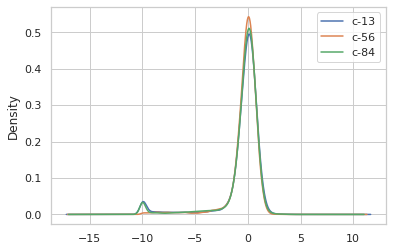

In [8]:
train_ft[['c-13', 'c-56', 'c-84']].plot.kde()

In [9]:
train_ft.isnull().sum(axis=0).max(), test_ft.isnull().sum(axis=0).max()

(0, 0)

In [10]:
train_ft.cp_dose.value_counts()

D1    12147
D2    11667
Name: cp_dose, dtype: int64

In [11]:
train_ft.cp_type.value_counts()

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64

In [12]:
train_ft[['cp_type', 'cp_dose']].value_counts()

cp_type      cp_dose
trt_cp       D1         11196
             D2         10752
ctl_vehicle  D1           951
             D2           915
dtype: int64

In [13]:
train_tgt_sc.head()

,sig_id,5-alpha_reductase_inhibitor,11-beta-hsd1_inhibitor,acat_inhibitor,acetylcholine_receptor_agonist,acetylcholine_receptor_antagonist,acetylcholinesterase_inhibitor,adenosine_receptor_agonist,adenosine_receptor_antagonist,adenylyl_cyclase_activator,...,tropomyosin_receptor_kinase_inhibitor,trpv_agonist,trpv_antagonist,tubulin_inhibitor,tyrosine_kinase_inhibitor,ubiquitin_specific_protease_inhibitor,vegfr_inhibitor,vitamin_b,vitamin_d_receptor_agonist,wnt_inhibitor
0,id_000644bb2,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,id_000779bfc,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,id_000a6266a,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,id_0015fd391,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,id_001626bd3,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


(array([155.,  24.,   6.,  11.,   6.,   2.,   0.,   0.,   1.,   1.]),
 array([  1. ,  84.1, 167.2, 250.3, 333.4, 416.5, 499.6, 582.7, 665.8,
        748.9, 832. ]),
 <BarContainer object of 10 artists>)

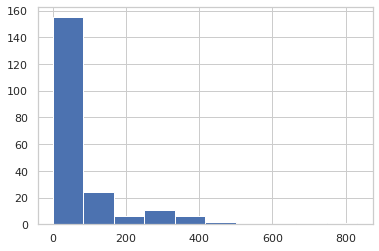

In [18]:
col_sums = train_tgt_sc.iloc[:, 1:train_tgt_sc.shape[1]].sum(axis=0)
plt.hist(col_sums)

In [21]:
np.sort(col_sums)

array([  1,   1,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,   6,
         6,   6,   6,   6,   6,   7,   7,   7,   7,  12,  12,  12,  12,
        12,  12,  12,  12,  12,  12,  12,  13,  13,  17,  18,  18,  18,
        18,  18,  18,  18,  18,  18,  18,  18,  18,  18,  19,  19,  19,
        19,  23,  23,  24,  24,  24,  24,  24,  25,  25,  25,  25,  25,
        25,  25,  25,  26,  26,  26,  29,  30,  30,  30,  30,  30,  30,
        31,  31,  31,  31,  32,  35,  36,  36,  36,  36,  36,  36,  36,
        36,  36,  36,  36,  36,  37,  37,  37,  37,  37,  37,  38,  39,
        42,  42,  42,  42,  43,  44,  47,  48,  48,  48,  48,  48,  48,
        48,  49,  50,  51,  54,  54,  54,  55,  55,  56,  56,  59,  60,
        60,  60,  61,  61,  61,  62,  62,  66,  67,  67,  68,  71,  72,
        72,  72,  73,  73,  73,  73,  73,  74,  74,  80,  80,  84,  85,
        89,  89,  92,  93,  96,  96,  96,  97,  98, 102, 103, 104, 106,
       106, 115, 115, 119, 121, 127, 130, 151, 158, 165, 170, 19

In [43]:
train_ft.sig_id

0        id_000644bb2
1        id_000779bfc
2        id_000a6266a
3        id_0015fd391
4        id_001626bd3
             ...     
23809    id_fffb1ceed
23810    id_fffb70c0c
23811    id_fffc1c3f4
23812    id_fffcb9e7c
23813    id_ffffdd77b
Name: sig_id, Length: 23814, dtype: object

In [22]:
train_ft.index = train_ft.sig_id.str.replace('id_', '').apply(lambda x: int(x, 16))
test_ft.index = test_ft.sig_id.str.replace('id_', '').apply(lambda x: int(x, 16))

In [23]:
train_ft.index, test_ft.index

(Int64Index([    6572978,     7838716,    10888810,    23057297,    23227347,
                24521346,    29197855,    34407556,    35962656,    37684798,
             ...
             68707968800, 68709904837, 68710631959, 68710984082, 68711883844,
             68714352365, 68714695692, 68715398132, 68716043900, 68719335291],
            dtype='int64', name='sig_id', length=23814),
 Int64Index([    5086771,    25787610,    37919579,    41349701,    41881731,
                69997412,   117196728,   119367074,   128062876,   153097090,
             ...
             68432682616, 68447086177, 68468929711, 68539870702, 68554452669,
             68568501127, 68604517645, 68642997328, 68647676402, 68674912438],
            dtype='int64', name='sig_id', length=3982))

In [24]:
df = pd.DataFrame({'idx': train_ft.index.tolist() + test_ft.index.tolist(),
                   'src': [0]*train_ft.shape[0] + [1]*test_ft.shape[0]})
df = df.sort_values('idx')

In [25]:
df.head(10)

,idx,src
23814,5086771,1
0,6572978,0
1,7838716,0
2,10888810,0
3,23057297,0
4,23227347,0
5,24521346,0
23815,25787610,1
6,29197855,0
7,34407556,0


*c* argument looks like a single numeric RGB or RGBA sequence, which should be avoided as value-mapping will have precedence in case its length matches with *x* & *y*.  Please use the *color* keyword-argument or provide a 2-D array with a single row if you intend to specify the same RGB or RGBA value for all points.


<AxesSubplot:xlabel='idx', ylabel='src'>

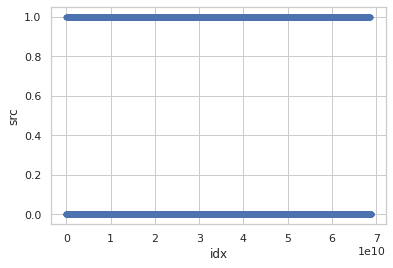

In [26]:
df.plot.scatter(x='idx', y='src')

In [85]:
print(train_ft.cp_type.value_counts(normalize=False))
print(train_ft.cp_type.value_counts(normalize=True))

trt_cp         21948
ctl_vehicle     1866
Name: cp_type, dtype: int64
trt_cp         0.921643
ctl_vehicle    0.078357
Name: cp_type, dtype: float64


In [86]:
print(test_ft.cp_type.value_counts(normalize=False))
print(test_ft.cp_type.value_counts(normalize=True))

trt_cp         3624
ctl_vehicle     358
Name: cp_type, dtype: int64
trt_cp         0.910095
ctl_vehicle    0.089905
Name: cp_type, dtype: float64


In [60]:
col_sums = train_tgt_sc.iloc[:, 1:train_tgt_sc.shape[1]].sum(axis=0)
print(col_sums.sort_values())

atp-sensitive_potassium_channel_antagonist      1
erbb2_inhibitor                                 1
diuretic                                        6
autotaxin_inhibitor                             6
protein_phosphatase_inhibitor                   6
                                             ... 
serotonin_receptor_antagonist                 404
dopamine_receptor_antagonist                  424
cyclooxygenase_inhibitor                      435
proteasome_inhibitor                          726
nfkb_inhibitor                                832
Length: 206, dtype: int64


In [61]:
row_sums = train_tgt_sc.iloc[:, 1:train_tgt_sc.shape[1]].sum(axis=1)
print(row_sums.sort_values())

23813    0
6859     0
11997    0
6861     0
6862     0
        ..
20584    7
14316    7
19186    7
4849     7
21197    7
Length: 23814, dtype: int64


In [84]:
train_ft.cp_type[(row_sums == 0).values].value_counts()

trt_cp         7501
ctl_vehicle    1866
Name: cp_type, dtype: int64

In [87]:
train_ft.columns

Index(['sig_id', 'cp_type', 'cp_time', 'cp_dose', 'g-0', 'g-1', 'g-2', 'g-3',
       'g-4', 'g-5',
       ...
       'c-90', 'c-91', 'c-92', 'c-93', 'c-94', 'c-95', 'c-96', 'c-97', 'c-98',
       'c-99'],
      dtype='object', length=876)

In [92]:
X = train_ft.loc[:, 'g-0':'c-99'].values

/home/giovenko/miniconda3/envs/ml/lib/python3.8/site-packages/seaborn/matrix.py:659: UserWarning: Clustering large matrix with scipy. Installing `fastcluster` may give better performance.
  warnings.warn(msg)


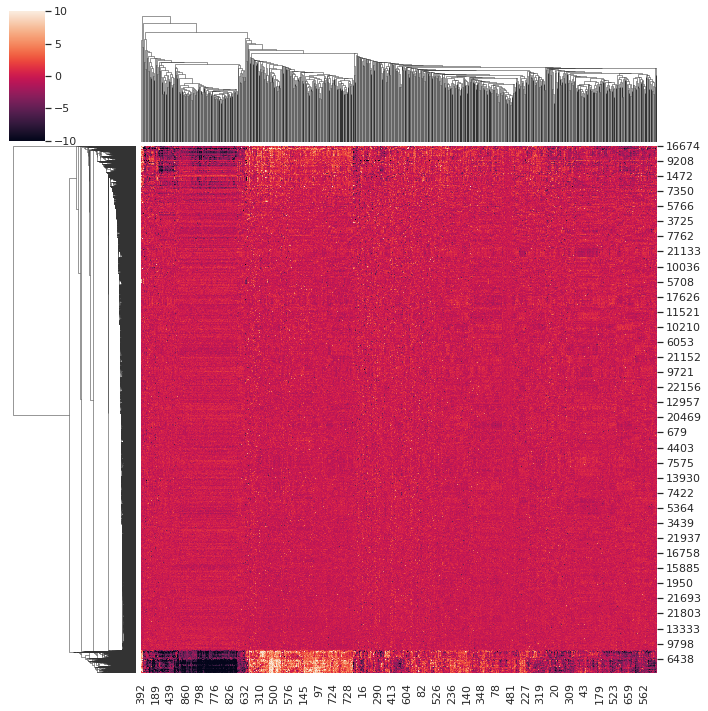

In [93]:
sns.clustermap(X, method='average', metric='euclidean')